# library

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import random

2022-06-14 11:53:51.672092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## mk_cd 함수

In [2]:
## 함수
def mk_cd(x):
    if type(x) == str:
        if x.isalpha():
            return x
        else:
            if len(x) == 6:
                return x
            else:
                return "0"*(6-len(x))+x
    elif type(x) == int:
        x = str(x)
        return "0"*(6-len(x))+x

# 슬라이싱 준비

In [3]:
len_a2012 = 284412
len_a2013 = 242826
len_a2014 = 242448
len_a2015 = 314361
len_a2016 = 263593
len_a2017 = 216591
len_a2018 = 307395
len_a2019 = 278610
len_a2020 = 371006
len_a2021 = 321808

In [4]:
len1215 = len_a2012+len_a2013+len_a2014+len_a2015 # y:2015
len1316 = len1215+len_a2016 # y:2016
len1417 = len1316+len_a2017 # y:2017
len1518 = len1417+len_a2018 # y:2018
len1619 = len1518+len_a2019 # y:2019
len1720 = len1619+len_a2020 # y:2020
len1821 = len1720+len_a2021 # y:2021

## [0], [1]은 train 슬라이싱 인덱스, [2]는 test인덱스로 구성

In [5]:
slicing_dic = {'1215':[0, len1215, len_a2015],
               '1316':[len_a2012, len1316, len_a2016],
               '1417':[len_a2012+len_a2013, len1417, len_a2017],
               '1518':[len_a2012+len_a2013+len_a2014, len1518, len_a2018],
               '1619':[len_a2012+len_a2013+len_a2014+len_a2015, len1619, len_a2019],
               '1720':[len_a2012+len_a2013+len_a2014+len_a2015+len_a2016,len1720, len_a2020],
               '1821':[len_a2012+len_a2013+len_a2014+len_a2015+len_a2016+len_a2017,len1821, len_a2021]}

## 슬라이싱 테스트

In [6]:
# d1221[:len1215]
# d1221[len_a2012:len1316]
# d1221[len_a2012+len_a2013:len1417]
# d1221[len_a2012+len_a2013+len_a2014:len1518]
# d1221[len_a2012+len_a2013+len_a2014+len_a2015:len1619]
# d1221[len_a2012+len_a2013+len_a2014+len_a2015+len_a2016:len1720]
# d1221[len_a2012+len_a2013+len_a2014+len_a2015+len_a2016+len_a2017:len1821]

# data load

In [7]:
d1221 = pd.read_feather('d1221.ftr', columns = None, use_threads = False) # threads 사용을 꺼도 난리 (그래도 비교적 덜 난리)

# category to object

In [8]:
d1221['code'] = list(map(mk_cd, d1221['code'])) # mk_cd함수 적용시켜야 ftr만들 때 에러 안남.

In [8]:
d1221.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843050 entries, 0 to 2843049
Columns: 823 entries, date to NextChange
dtypes: float64(821), int64(1), object(1)
memory usage: 17.4+ GB


# modeling

In [9]:
# NextChange
d1221['NextChange'] = np.where(d1221['NextChange']>0.05, 1, 0)

In [10]:
from datetime import datetime
# 1. Logistic regression
from sklearn.linear_model import LogisticRegression
# 2. Decision tree
from sklearn.tree import DecisionTreeClassifier
# 3. Support vector machine
from sklearn.svm import SVC
# 4. Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
# 5. K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
# 6. Random forest
from sklearn.ensemble import RandomForestClassifier
# 7. Gradient boosing
from sklearn.ensemble import GradientBoostingClassifier
# 8. Neural network
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from xgboost import XGBClassifier # decision tree 앙상블 모델, 부스팅
# [light gbm 장점, 하이퍼파라미터 튜닝 방안](https://ariz1623.tistory.com/209)
# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
# [XGBoost와 LightGBM 하이퍼파라미터 튜닝 가이드](https://psystat.tistory.com/131)


from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier

# 모델 평가 지표 scoring metrics
from sklearn.model_selection import cross_val_score # model 검증

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

import ast # convert string to function

# [scikit-learn classifier metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)
# [classification metrics 1](https://hong-yp-ml-records.tistory.com/29)
# [classification metrics 2](https://sw-data.tistory.com/23) -> regression metrics 참고

results = []
def my_classifier():
    
    # X, y
    X = d1221.iloc[:,2:-1] # 1221 데이터
    y = d1221.iloc[:,-1]
    
    # seed 고정
    user_seed = 0
    random.seed(user_seed) # seed 고정
    
    # 모델
    # (같은 줄에 써놓은 애들끼리 하이퍼파리미터 구성 비슷하거나 같음)
    Logistic_Regression = LogisticRegression(n_jobs=32,
                                             random_state=user_seed,
                                             max_iter=10) # , verbose = 1
    # [모델훈련](https://taek98.tistory.com/15)

    DecisionTree = DecisionTreeClassifier(max_depth = 10,
                                          random_state=user_seed,
                                          max_leaf_nodes=4)
    
    RandomForest = RandomForestClassifier(n_estimators=10,
                                          max_depth=10,
                                          random_state=user_seed,
                                          max_leaf_nodes=4,
                                          n_jobs=32) # , verbose=1
    
    GradientBoosting = GradientBoostingClassifier(n_estimators=10,
                                                  max_depth = 10,
                                                  random_state = user_seed,
                                                  max_leaf_nodes=4,
                                                  learning_rate=0.05) # , verbose = 1
    
    SVM = SVC(max_iter=1000,
              random_state=user_seed) # , verbose=True
    
    Gaussian_NB = GaussianNB()
    KNeighbors = KNeighborsClassifier(n_jobs = 32)
    MLP = MLPClassifier(max_iter=1000,
                        batch_size = 10000,
                        shuffle=True,
                        random_state = user_seed,
                        early_stopping=True) # early_stopping 있어서 max_iter 키움., verbose=True

    XGBoost = XGBClassifier(n_jobs=32,
                            max_depth=10,
                            n_estimators=10,
                            learning_rate=0.05,
                            random_state = user_seed) # early_stopping_rounds = 50,
    # [XGBoost Classifier hyper params](https://xgboost.readthedocs.io/en/stable/python/python_api.html)
    LGBM = lgb.LGBMClassifier(num_leaves=31,
                              learning_rate=0.05,
                              n_estimators=10,
                              max_depth = 10,
                              random_state = user_seed) # early_stopping_rounds, best_iteration_,
    # max_depth : 과적합 방지를 위해 깊이 크기 제한
    # n_estimators : 너무 크면 과적합, 성능저하
    # learning_rate 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안이므로 이를 적용하는 것도 좋다.
    # [LGBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)
    
    # [gbm grid CV, best_iteration_ 참고](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/sklearn_example.py)
    # [how to save model to best iteration if early stopping does not happen?](https://github.com/Microsoft/LightGBM/issues/1683)
    
    dummy = DummyClassifier(strategy = 'stratified', random_state = user_seed) # strategy 옵션: 'stratified', 'uniform', 'most_frequent'
    
    my_model_list = ['LGBM', 'XGBoost', 'dummy',
                     'Logistic_Regression', 'SVM', 'Gaussian_NB', 'KNeighbors',
                     'MLP',
                     'DecisionTree', 'RandomForest', 'GradientBoosting'] # 오래 걸리는걸 앞으로 뺌
    
    i = 0
    
    ######################################################################### fitting
    for model_nm in tqdm(my_model_list):
        print(f'<<<---{model_nm} start--->>>')
        print(datetime.now().strftime('%H:%M:%S'))
        cntcnt = 0
        # cv # 년도 나눠지는 것에 따라서 개수 정함.
        for slicer in slicing_dic:
            print(f'<<<---{slicer} start--->>>')
            print(datetime.now().strftime('%H:%M:%S'))
            tmpX = X[slicing_dic[slicer][0]:slicing_dic[slicer][1]].reset_index(drop = True) # X를 연속 4년치 꺼내서 reset_index(drop = True)
            tmpy = y[slicing_dic[slicer][0]:slicing_dic[slicer][1]].reset_index(drop = True) # y를 연속 4년치 꺼내서 reset_index(drop = True)
#             tmp_all = d1221[slicing_dic[slicer][0]:slicing_dic[slicer][1]].reset_index(drop = True) # 전체데이터

            X_train = tmpX[:-slicing_dic[slicer][2]] # 기준년도 앞
            X_test = tmpX[-slicing_dic[slicer][2]:] # 기준년도 이하
            y_train = tmpy[:-slicing_dic[slicer][2]] # 기준년도 앞
            y_test = tmpy[-slicing_dic[slicer][2]:] # 기준년도 이하
            
            # train끼리 idx 같아야 하므로
            len_train = slicing_dic[slicer][1]-(slicing_dic[slicer][2]+slicing_dic[slicer][0]) # 혹은 tmp_train.shape[0]
            len(list(range(len_train)))
            train_idx = list(range(len_train))
            random.shuffle(train_idx) # 자동으로 덮어쓰기
            
            # test끼리 idx 같아야 하므로
            len_train_to_test = slicing_dic[slicer][1]-slicing_dic[slicer][0]
            test_idx = list(range(len_train,len_train_to_test)) # +1 안해줘도 되는 거 위 cell에서 확인
            len(test_idx)
            random.shuffle(test_idx) # 자동으로 덮어쓰기
            
            X_train = X_train.loc[train_idx]
            y_train = y_train.loc[train_idx]
            X_test = X_test.loc[test_idx]
            y_test = y_test.loc[test_idx]
            ###########################################
            y_train = np.array(y_train).reshape(-1,1) # 1열짜리로 만드는 것
            y_test = np.array(y_test).reshape(-1,1)

            ######################################################## cv를 위한 데이터 slicing 작업 끝

            # fitting은 cv 안에 넣기
            if model_nm == 'LGBM':
                model_ = eval(model_nm).fit(X_train, y_train,
                                            eval_set=[(X_test, y_test)],
                                            eval_metric='auc',
                                            early_stopping_rounds=5) # map: mean average precision
                # eval_metric = logloss, auc, error
                y_pred_test = model_.predict(X_test, num_iteration=LGBM.best_iteration_) # 예측
            # If early stopping occurs, the model will have three additional fields: best_score, best_iteration and best_ntree_limit
            # [eval_metric](https://stats.stackexchange.com/questions/493981/xgboost-mean-average-precision-eval-metric-for-classification)
            # [gbm.fit verbose = 10, #verbose = 10 : 10번 반복할 때마다 logloss값을 보여준다.](https://dacon.io/codeshare/1827)
            # [Classifier, Regressor eval_metric 예시](https://hwi-doc.tistory.com/entry/%EC%9D%B4%ED%95%B4%ED%95%98%EA%B3%A0-%EC%82%AC%EC%9A%A9%ED%95%98%EC%9E%90-XGBoost)
            # [XGBoost parameters](https://xgboost.readthedocs.io/en/latest/parameter.html#)
            # error: For MAP metric, there should be query information
            elif model_nm == 'XGBoost': # xgboost_linear가 느려서
                cntcnt += 1
                print(f'$$$$$---{cntcnt}')
                model_ = eval(model_nm).fit(X_train, y_train,
                                            eval_set=[(X_test, y_test)],
                                            eval_metric='auc',
                                            early_stopping_rounds=5) # ,verbose = True
                y_pred_test = model_.predict(X_test) # 예측
            
            else:
                cntcnt += 1
                print(f'$$$$$---{cntcnt}')
                model_ = eval(model_nm).fit(X_train, y_train)
                y_pred_test = model_.predict(X_test) # 예측

            accuracy = accuracy_score(y_test, y_pred_test)
            roc_auc = roc_auc_score(y_test, y_pred_test)
            f1 = f1_score(y_test, y_pred_test)
            jaccard = jaccard_score(y_test, y_pred_test)
            cv_scores = cross_val_score(eval(model_nm), tmpX, tmpy, cv=7, n_jobs = 32)
            
            _ = dummy.fit(X_train, y_train)
            dummy_score = dummy.score(X_test, y_test)

            results.append([i, f'{model_nm}', accuracy, roc_auc, f1, jaccard, cv_scores, dummy_score])
            i+=1
        ################################################################
        print(results[-7:])
    return results#score_dic#[0]

In [ ]:
import time
start = time.time()
_ = my_classifier()
results
time.time()-start

# local variable 변수명 referenced before assignment
# 함수 밖에서 설정한 변수를 함수 안에서 쓰려고 할 때 발생하는 에러

# logistic regression : 총 22분 걸림
# 'SVM' : 한 타임에 40분씩 걸림 (5번째 iter가 9:40분에 시작됨. 6번째 iter는 11시에 끝나야 함.)
# 'Gaussian_NB' : 
# 'KNeighbors' : 
# 'MLP' : 
# 'DecisionTree' : 
# 'RandomForest' : 
# 'GradientBoosting' : 
# 'XGBoost' : 
# 'LGBM' : 
# 'dummy' : 

  0%|                                                    | 0/11 [00:00<?, ?it/s]

<<<---LGBM start--->>>
11:55:35
<<<---1215 start--->>>
11:55:35
[1]	valid_0's auc: 0.543587	valid_0's binary_logloss: 0.689986
[2]	valid_0's auc: 0.543863	valid_0's binary_logloss: 0.689661
[3]	valid_0's auc: 0.545365	valid_0's binary_logloss: 0.689346
[4]	valid_0's auc: 0.546417	valid_0's binary_logloss: 0.68905
[5]	valid_0's auc: 0.547451	valid_0's binary_logloss: 0.688781
[6]	valid_0's auc: 0.548138	valid_0's binary_logloss: 0.68855
[7]	valid_0's auc: 0.548717	valid_0's binary_logloss: 0.688339
[8]	valid_0's auc: 0.549127	valid_0's binary_logloss: 0.688136
[9]	valid_0's auc: 0.549584	valid_0's binary_logloss: 0.687945
[10]	valid_0's auc: 0.550061	valid_0's binary_logloss: 0.68778


In [ ]:
from datetime import datetime
print(datetime.now().strftime('%H:%M:%S'))
print(f'<<<---{model_nm} start, {datetime.now().strftime('%H:%M:%S')}--->>>')

In [1]:
results

NameError: name 'results' is not defined

# plot을 위한 준비

In [36]:
model_list = ['Logistic_Regression', 'SVM', 'Gaussian_NB', 'KNeighbors',
              'MLP',
              'DecisionTree', 'RandomForest', 'GradientBoosting',
              'XGBoost', 'LGBM', 'dummy']
mse_dic = {i:[] for i in model_list}
r2_dic = {i:[] for i in model_list}
cv_dic = {i:[] for i in model_list}
for i in results:
    mse_dic[i[1]].append(i[2])
    r2_dic[i[1]].append(i[3])
    cv_dic[i[1]].append(i[4].mean())


# import math
# 리스트에 mean 함수가 내장이 안돼있다니...
mean_mse_score = {i:[] for i in model_list}
mean_r2_score = {i:[] for i in model_list}
mean_cv_score = {i:[] for i in model_list}
for i in model_list:
    mean_mse_score[i] = sum(mse_dic[i])/len(mse_dic[i])
    mean_r2_score[i] = sum(r2_dic[i])/len(r2_dic[i])
    mean_cv_score[i] = sum(cv_dic[i])/len(cv_dic[i])


# 정렬
mse_score_lst = sorted(mean_mse_score.items(), key = lambda t : t[1]) #mse 작은 순으로 줄 세워짐.
r2_score_lst = sorted(mean_r2_score.items(), key = lambda t : t[1]) #r2 작은 순으로 줄 세워짐.
cv_score_lst = sorted(mean_cv_score.items(), key = lambda t : t[1]) #cv 작은 순으로 줄 세워짐.
mse_score_lst
r2_score_lst
cv_score_lst

[('gbm', 17.038864984800767),
 ('random_forest', 17.107203345934888),
 ('DecisionTree', 17.11512487277789),
 ('dummy', 17.134043972509883),
 ('ardr_linear', 17.134043972509886),
 ('elasticnet', 17.137555008127638),
 ('lasso', 17.137642852401786),
 ('xgboost_linear', 17.15259417521747),
 ('ridge', 17.310136961060802),
 ('linear', 17.325673964034888),
 ('bayesian_ridge', 101.68012006811473)]

[('bayesian_ridge', -5.398477134480513),
 ('linear', -0.011225810189836911),
 ('ridge', -0.010385648064833315),
 ('xgboost_linear', -0.0022957540357875545),
 ('lasso', -0.0007475429380959163),
 ('elasticnet', -0.0007194438907102617),
 ('dummy', -0.0005254219797174997),
 ('ardr_linear', -0.0005254219797174679),
 ('DecisionTree', 0.0004419917232842011),
 ('random_forest', 0.0009220048508910164),
 ('gbm', 0.004717779053611736)]

[('bayesian_ridge', -4811.252901313237),
 ('linear', -3264.9552931690337),
 ('ridge', -207.91967448978886),
 ('lasso', -0.04146327361786053),
 ('elasticnet', -0.0397491315758709),
 ('ardr_linear', -0.00029877558233826657),
 ('dummy', -0.00029877558233826657),
 ('DecisionTree', 0.004382666428617596),
 ('random_forest', 0.004641618186416895),
 ('xgboost_linear', 0.006744282088719398),
 ('gbm', 0.01615828967311104)]

In [37]:
# 다시 dic
mse_score_dic = {}
r2_score_dic = {}
cv_score_dic = {}

for i in mse_score_lst:
    mse_score_dic[i[0]] = i[1]
r2_score_dic = {i[0]:i[1] for i in r2_score_lst}
cv_score_dic = {i[0]:i[1] for i in cv_score_lst}

In [38]:
mse_df = pd.DataFrame(mse_score_dic.items(), columns=['key', 'value'])
mse_df

r2_df = pd.DataFrame(r2_score_dic.items(), columns=['key', 'value'])
r2_df

cv_df = pd.DataFrame(cv_score_dic.items(), columns=['key', 'value'])
cv_df

,key,value
0,gbm,17.038865
1,random_forest,17.107203
2,DecisionTree,17.115125
3,dummy,17.134044
4,ardr_linear,17.134044
5,elasticnet,17.137555
6,lasso,17.137643
7,xgboost_linear,17.152594
8,ridge,17.310137
9,linear,17.325674


,key,value
0,bayesian_ridge,-5.398477
1,linear,-0.011226
2,ridge,-0.010386
3,xgboost_linear,-0.002296
4,lasso,-0.000748
5,elasticnet,-0.000719
6,dummy,-0.000525
7,ardr_linear,-0.000525
8,DecisionTree,0.000442
9,random_forest,0.000922


,key,value
0,bayesian_ridge,-4811.252901
1,linear,-3264.955293
2,ridge,-207.919674
3,lasso,-0.041463
4,elasticnet,-0.039749
5,ardr_linear,-0.000299
6,dummy,-0.000299
7,DecisionTree,0.004383
8,random_forest,0.004642
9,xgboost_linear,0.006744


# plot

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 750x450 with 0 Axes>

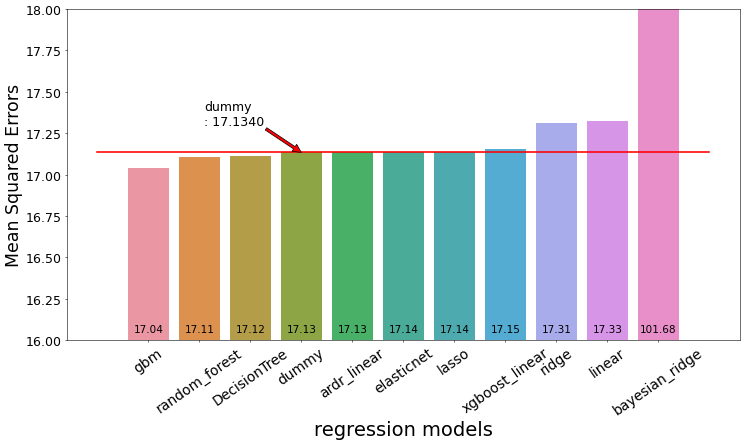

In [376]:
plt.figure(figsize=(15,9), dpi = 50)
g = sns.barplot(x = 'key', y = 'value', data=mse_df, capsize=.2)
_ = g.set_xticks(range(len(mse_df)))
_ = g.set_xticklabels(g.get_xticklabels(), rotation=35, fontsize = 20)
_ = plt.setp(g.get_yticklabels(), fontsize =18)
_ = g.set_xlabel("regression models", fontsize = 28)
_ = g.set_ylabel("Mean Squared Errors", fontsize = 25)
_ = g.set_ylim([16, 18]) # g.set_ylim([0, 18]) # ax.set(ylim=(0.4, 0.6))

mse_dummy_mean = mse_df[mse_df.key=='dummy']['value'].values
_ = g.plot([-1,len(mse_df)], [mse_dummy_mean, mse_dummy_mean], color = 'red', linewidth = 2.3)
_ = g.annotate(text = f'dummy\n: {mse_dummy_mean[0]:.4f}', xy = (3, mse_dummy_mean), xytext = (1.1, 17.3),
               arrowprops = dict(facecolor = 'red', shrink = 0), fontsize = 18)


val = mse_df['value']
cnt = 0
for i in range(len(mse_df)):
    tmp_fval = f'{val[i]:.2f}'
    if tmp_fval.index('.') == 3:
        _ = g.text(cnt-0.355, 16.05, tmp_fval, fontsize=15)
    elif tmp_fval.index('.') == 2:
        _ = g.text(cnt-0.285, 16.05, tmp_fval, fontsize=15)
    cnt += 1

plt.tight_layout()
plt.savefig('mse_reg_plot.png')

[Demonstration of multi-metric evaluation on cross_val_score and GridSearchCV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html?highlight=decisiontreeclassifier) <br>
[Classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html?highlight=decisiontreeclassifier) <br>